In [ ]:
## Exercise 1.)
# A perceptron is a neural network with a single layer of input linear neurons followed by an output unit based on 
# the sign(x) function. 

In [ ]:
## Exercise 2.)
# There are both single and multi layer perceptrons(MLP). Single perceptrons are based on training an algorithm to run an neural 
# network for a fixed number of iterations or until the total error becomes smaller than a predefined threshold. 
# The MLP is similar to a single perceptron but has a few differences. MLP'shas a flow of information that starts 
# in one direction and flows through the others. The MLP has two weights W and H that are the corresponding bias weights. 

In [ ]:
## Exercise 3.)
# A hard margin refers to a boundary in SVM that allows zero errors.

In [ ]:
## Exercise 4.)
# b.)

In [ ]:
## Exercise 5.)
# a.)

In [2]:
## Exercise 6
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC


s3= boto3.resource('s3')
bucket_name= 'macklins-bucket'
bucket= s3.Bucket(bucket_name)

file_key= 'framingham.csv'

bucket_object= bucket.Object(file_key)
file_object= bucket_object.get()
file_content_stream= file_object.get('Body')

## Reading the data file
heart= pd.read_csv(file_content_stream)
heart.head()

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# removing the observations with NA
heart= heart.dropna()

In [4]:
# defining the input and target variables
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

# splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# min-max transformation
scaler= MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import tensorflow as tf

## creating a list to store the results
model1_results= list()
model2_results= list()
model3_results= list()
model4_results= list()

# creating the for loop
for i in range (0,100):
    
    ### Model 1 ###
    model1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, input_dim = 5, activation = 'tanh'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])

    # applying the compile function for the metrics
    model1.compile(optimizer= 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy']) 
    
    # fitting the model with the appropriate points
    model1.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), 
            epochs = 100, 
            batch_size = 500, 
            verbose = 0)
    
    # making the prediction
    model1_preds = model1.predict(X_test)[:, 1]
    
    # applying the 15% cutoff
    model1_labels = np.where(model1_preds < 0.15,0, 1)
    
    # computing the recall
    model1_recall = recall_score(Y_test, model1_labels)
    
    # storing the results
    model1_results.append(model1_recall)
    
    
    
    ### Model 2 ###
    model2 = tf.keras.models.Sequential([

        tf.keras.layers.Dense(4, input_dim = 5, activation = 'relu'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])
    
    # applying the compile function for the metrics
    model2.compile(optimizer = 'sgd',  loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    # fitting the model with the appropriate points
    model2.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 2), 
            epochs = 100, 
            batch_size= 500, 
            verbose = 0)
    
    # making the prediction
    model2_preds = model2.predict(X_test)[:, 1]
    
    # applying the 15% cutoff
    model2_labels = np.where(model2_preds < 0.15, 0, 1)
    
    # computing the recall
    model2_recall = recall_score(Y_test, model2_labels)
    
    # storing the results
    model2_results.append(model2_recall)
    
    
    
    ### Creating the SVC models ###
    
    # model 3
    model3 = SVC(kernel= 'rbf', probability= True).fit(X_train, Y_train)
    
    # model 4
    model4 = SVC(kernel= 'poly', probability= True).fit(X_train, Y_train)
    
    # making the predictions for the SVC models
    model3_preds = model3.predict_proba(X_test)[:,1]
    model4_preds = model4.predict_proba(X_test)[:,1]
    
    # applying the cutoffs
    model3_labels = np.where(model3_preds < 0.15, 0, 1)
    model4_labels = np.where(model4_preds < 0.15, 0, 1)
    
    # calculating the recall
    model3_recall = recall_score(Y_test, model3_labels)
    model4_recall = recall_score(Y_test, model4_labels)
    
    # storing the results of the svc models
    model3_results.append(model3_recall)
    model4_results.append(model4_recall)

In [15]:
## calculating the mean recall score from 100 iterations for all models
print('Average Recall Score of model 1:', np.mean(model1_results))
print('Average Recall Score of model 2:', np.mean(model2_results))
print('Average Recall Score of model 3:', np.mean(model3_results))
print('Average Recall Score of model 4:', np.mean(model4_results))

Average Recall Score of model 1: 0.5407758620689654
Average Recall Score of model 2: 0.6873275862068966
Average Recall Score of model 3: 0.44551724137931026
Average Recall Score of model 4: 0.5732758620689655


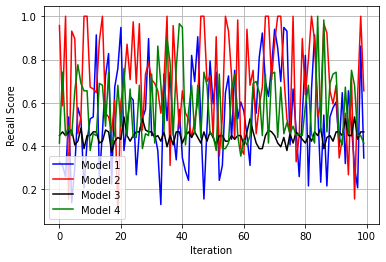

In [14]:
## creating a visualization showing the recall for each model at all iterations
import matplotlib.pyplot as plt
plt.plot(model1_results , color = 'blue')
plt.plot(model2_results , color = 'red')
plt.plot(model3_results , color = 'black')
plt.plot(model4_results , color = 'green')
plt.xlabel('Iteration')
plt.ylabel('Recall Score')
plt.legend(labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.grid()
plt.grid
plt.show;

In [ ]:
# From the above results model 2 would be the most appropriate choice as the recall score is the highest.